In [1]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [2]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,36667,None,None,85832.227587
2020-06-13,36668,None,None,79743.842796
2020-06-14,36669,None,None,74088.770306
2020-06-15,36670,None,None,68761.785245
2020-06-16,36671,None,None,64016.780196
...,...,...,...,...
2021-03-04,36932,None,None,134381.400093
2021-03-05,36933,None,None,131146.668729
2021-03-06,36934,None,None,127403.521932


In [3]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-03-08_2021-03-08-16-40.pickle


In [4]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-03-07_2021-03-07-17-58.pickle


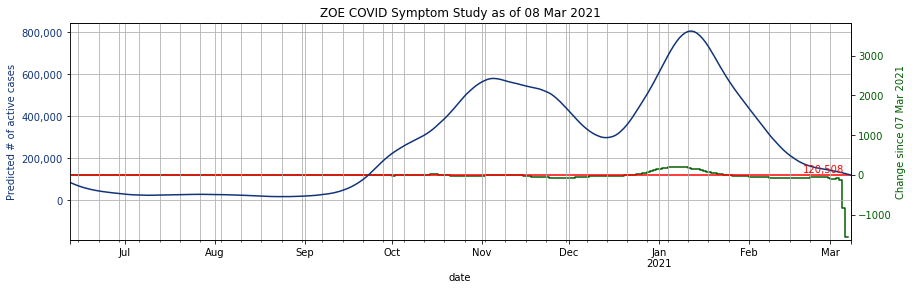

In [5]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

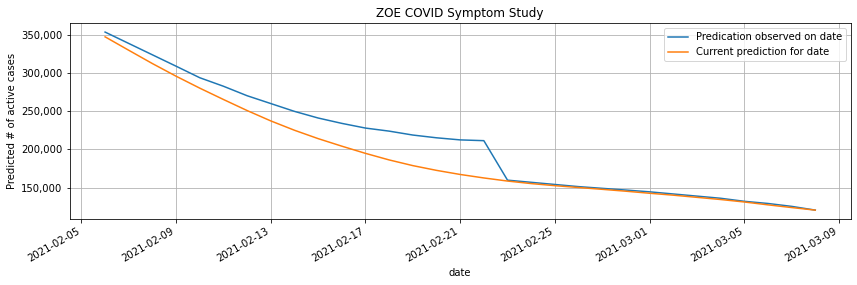

In [6]:
plot_study_evolution(curr_date, days=30)

In [7]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [8]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-03-08_2021-03-08-16-40.pickle


In [9]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
244,Nuneaton and Bedworth,E07000219,2.290791
377,Stirling,S12000030,1.489494
189,West Lindsey,E07000142,1.337644
297,Falkirk,S12000014,1.209255
180,Cannock Chase,E07000192,1.174796
205,Ashfield,E07000170,1.121309
16,East Riding of Yorkshire,E06000011,1.042751
266,Bolton,E08000001,0.995179
70,North East Derbyshire,E07000038,0.887343
326,Isle of Anglesey,W06000001,0.841441
